<img src="ku_logo_uk_v.png" alt="drawing" width="500" style="float:right"/>


# Welcome to Workshop 12 - Introduction to Programming and Numerical Analysis !!!

# The Data Project follow-up
<img src="lego_pic.png" alt="drawing" width="500" style="float:center"/>


You should all have received feedback from you data projects.\
Let me know if you have any questions or want me to elaborate on something.


# Plan for today
- Dynamic model example from 2021 exam
- Problem set 7


# Dynamic model example from 2021 exam

Considee a consumption-savings model where households may **borrow** money in the first period. There are **2 kinds** of households: the first type will likely see a **low level** of period 2 income, whereas the second type will likely see a **high level** second period income. 

A household lives for 2 periods and makes decisions on consumption and saving in each period.  

**First period:**   
The household gets utility from immediate consumption.  Household takes into account that next period income is stochastic.

$$
\begin{aligned}
v_1(m_1)&=\max_{c_1}\frac{c_{1}^{1-\rho}}{1-\rho}+\beta\mathbb{E}_{1}\left[v_2(m_2)\right]\\&\text{s.t.}&\\
a_1 & = m_1 - c_1 \\
m_2 & = (1+r)a_1 + y_2 \\
y_{2} & = \begin{cases}
1 - \Delta & \text{with prob. } P_{low}\\
1 + \Delta & \text{with prob. } P_{high} 
\end{cases}\\
a_1 & > -\frac{1-\Delta}{1+r} 
\end{aligned}
$$

where
* $\beta > 0$ is the discount factor
* $\mathbb{E}_1$ is the expectation operator conditional on information in period 1
* $y_2$ is income in period 2
* $\Delta \in (0,1)$ is the level of income risk 
* $r$ is the interest rate
* $\frac{1-\Delta}{1+r} > c_1 - m_1$ ensures the household cannot borrow *more* than it will be able to repay in next period when $y_2$ is received.




The **2 types** of households are defined by their different $(P_{low},P_{high})$:
* Type 1: 
    * $P_{low} = 0.9$ 
    * $P_{high} = 0.1$
* Type 2:
    * $P_{low} = 0.1$ 
    * $P_{high} = 0.9$

    


**Second period:**   

The household gets utility from **consuming** and **leaving a bequest** (warm glow),

$$
\begin{aligned}
v_{2}(m_{2})&= \max_{c_{2}}\frac{c_{2}^{1-\rho}}{1-\rho}+\nu\frac{(a_2+\kappa)^{1-\rho}}{1-\rho}\\
\text{s.t.} \\
a_2 &= m_2-c_2 \\
a_2 &\geq 0
\end{aligned}
$$

where
* $m_t$ is cash-on-hand 
* $c_t$ is consumption
* $a_t$ is end-of-period assets 
* $\rho > 1$ is the risk aversion coefficient
* $\nu > 0 $ is the strength of the bequest motive
* $\kappa > 0$ is the degree of luxuriousness in the bequest motive  
* $a_2\geq0$ ensures the household *cannot* die in debt

In [1]:
# Imports and set magics

%load_ext autoreload
%autoreload 2

from types import SimpleNamespace
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

import ConsumptionSaving as cs



## Firstly i define the model parameters in a simple namespace

In [2]:
# Create a SimpleNamespace for each household type
from types import SimpleNamespace

rho = 3
kappa = .5
nu = .1
r = .04
beta = .95
Delta = .5

# Create a SimpleNamespace for each households type
par_1 = SimpleNamespace()
par_1.rho = rho
par_1.kappa = kappa
par_1.nu = nu
par_1.r = r
par_1.beta = beta
par_1.Delta = Delta
par_1.P_low = 0.9
par_1.P_high = 0.1

par_2 = SimpleNamespace()
par_2.rho = rho
par_2.kappa = kappa
par_2.nu = nu
par_2.r = r
par_2.beta = beta
par_2.Delta = Delta
par_2.P_low = 0.1
par_2.P_high = 0.9




## Secound i solve the model for both consumer types using the class ConsumptionSavingModel defined above and implemented in the python file ConsumptionSaving.py

In [3]:
# a. Call the ConsumptionSavingModel class
type1_model = cs.ConsumptionSavingModel(par_1)
type2_model = cs.ConsumptionSavingModel(par_2)


# b. Extract the optimal m1,v1,c1,m2,v2,c2 for each type

# i. Type 1
m1_type1,v1_type1,c1_type1,m2_type1,v2_type1,c2_type1 = type1_model.solve()

# ii. Type 2
m1_type2,v1_type2,c1_type2,m2_type2,v2_type2,c2_type2 = type2_model.solve()

## Display the utility as a function of money

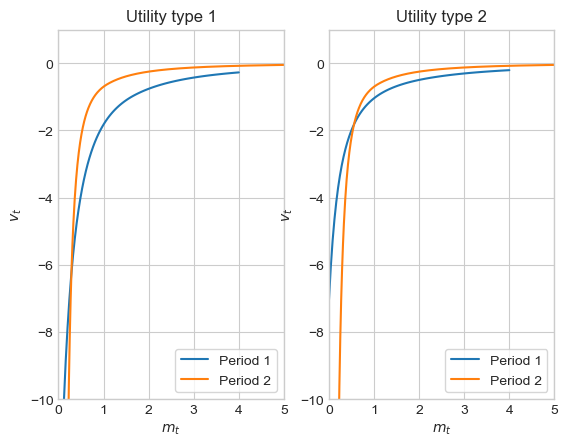

In [4]:
fig = plt.figure()

# Type 1 optimal value function
ax = fig.add_subplot(1,2,1)
cs.plotting(ax, [m1_type1,m2_type1],[v1_type1, v2_type1], title ='Utility type 1', xlabel='$m_t$', ylabel='$v_t$', ylim =[-10,1], xlim = [0,5])

ax = fig.add_subplot(1,2,2)
cs.plotting(ax, [m1_type2,m2_type2],[v1_type2, v2_type2], title = 'Utility type 2', xlabel='$m_t$', ylabel='$v_t$', ylim = [-10,1],xlim = [0,5])



## Displaying the optimal consumption 

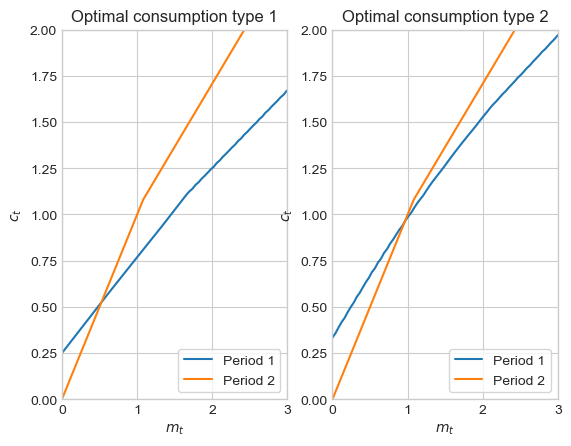

In [5]:
fig = plt.figure()

# Type 1 optimal value function
ax = fig.add_subplot(1,2,1)

cs.plotting(ax, [m1_type1,m2_type1],[c1_type1, c2_type1], title ='Optimal consumption type 1', xlabel='$m_t$', ylabel='$c_t$', ylim=[0,2],xlim = [0,3])

ax = fig.add_subplot(1,2,2)
cs.plotting(ax, [m1_type2,m2_type2],[c1_type2, c2_type2], title = 'Optimal consumption type 2', xlabel='$m_t$', ylabel='$c_t$', ylim = [0,2], xlim = [0,3])



# Problem set 7